In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Machine Learning (introduction)

- AI and Machine learning
- Features and Labels
- Error estimation (loss and cost)
- Generalization (population and sample)
- Approaches: supervised learning, unsupervised learning, self-supervised leatrning, dimensionality reduction, reinforecement learning
- Representation learning and deep models
- Learning types: regression, classification, clustering, etc. 

## AI and Machine learning

AI in an general notion and has many sub-fields or directions, one of them is a Machine Learning
<br>
Machine Learning: "Machine learning (ML) is the study of computer algorithms that improve automatically through experience and by the use of data" <a ref="https://en.wikipedia.org/wiki/Machine_learning">(Wikipedia)</a>

Machine learning approximation of function: 
$$
f:(X, P_x) -> (Y, P_y)
$$
We have suple of data $X = (X^1, X^2, \dots, X^m)$ and we need to find right function $f$ (often from function class $\mathcal{F}$) which maps our data to the destination domain $Y$
$$
f:X \to Y
$$
Sometimes $Y = X$

## Features and labels

Inpiut data, should be converted in machematical objects (often Euclidean vectors, or elements of manifolds)
<br>
Predict sentiment on text - is Facebook, Twitter, LinkedIn comment is positive, negative or neutral
<br>
Classify images: is human, cat, dog on image or not
<br>
Predict house prices by it's features, rooms, square meters, location etc

#### Features

Tabula data: we have information about each dimension

In [39]:
from pathlib import Path

In [40]:
! pip install -U pandas

In [41]:
import pandas as pd

In [42]:
! pip install -U scikit-learn

In [43]:
from sklearn import datasets as ds

In [44]:
boston = ds.load_boston()
boston_cols = boston.feature_names
boston_cols

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [45]:
bpston_data = pd.DataFrame(boston.data)
bpston_data.columns = boston.feature_names
bpston_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [46]:
! pip install matplotlib

In [47]:
import matplotlib.pyplot as plt

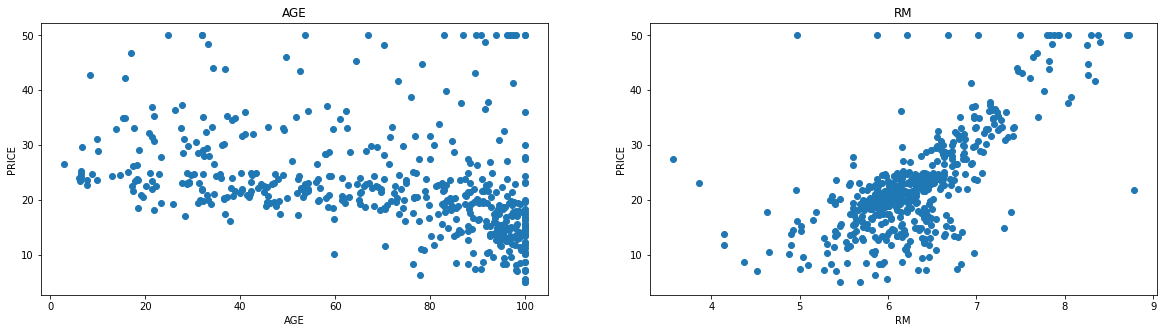

In [48]:
plt.figure(figsize=(20, 5))

features = ['AGE', 'RM']
target = boston['target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bpston_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

Feature types:
- Categorical
- Numerical

#### General data

Images and text for instance does not have particulad features

For text each word is converted in vector from 
$$
\mathbb{R}^n
$$
<br>
For images 
$$
X^i \in \mathbb{R}^{c \times h \times w}
$$
<br>
There might be input data of mixed types, for instance 
$$
G^i = (X^i, A)
$$
where$X^i \in \mathbb{R}^d$ and $A \in \mathbb{R}^{n \times n}$


#### Labels

labels are predefined values $Y^i$ for each $X^i$
$$
\text{Labels: } (Y^1, Y^2, \dots, Y^m)
$$
Labels might be any mathematical objects, often Euclidean vectors or elements of manifolds as well as input data
<br>
For instance targets in boston house prices
<br>
Learning means - find appropriated function $f:X \to Y$ for which $f(X^i)$ as as closeas possible to $Y^i$

## Parametrized model

Oftem ML models $f:X \to Y$ are class of parametrized functions:
- Linear function:
$$
f(X) = W \dot X + b
$$
with parameters $W \in \mathbb{R}^d$ and $b \in \mathbb{R}^1$
- Logistic function (Logitic regression):
$$
f(X) = \sigma(W \dot X + b)
$$
with parameters $W \in \mathbb{R}^d$ and $b \in \mathbb{R}^1$
- Neural networks (Multi-layer perceptron):
$$
f(X) = f^L \circ f^{L-1} \circ \dots \circ f^1
$$
Where $f^l(Z^l) = a(W^l \dot Z^l + b^l)$
with parameters $W^l \in \mathbb{R}^{n^l \times m^l}$ and $b^l \in \mathbb{R}^{m^l}$

## Loss and cost

Loss is the estimation of the error for each point $X^i$ with respect of $Y^i$
$$
L(f(X^i), Y^i)
$$
for instance
$$
L(f(X^i), Y^i) = ||f(X^i) - Y^i||_2^2
$$
Euclidean distance

Cost is the aggreagtion our loss for entire $X = (X^1, X^2, \dots, X^m)$
$$
C = \text{aggr}_{i=1}^m(L(f(X^i), Y^i))
$$
For instance calculate the mean
$$
C = \frac{1}{m}\sum_{i=1}^m(L(f(X^i), Y^i))
$$
More concrete:
$$
C = \frac{1}{m}\sum_{i=1}^m(||f(X^i) - Y^i||_2^2)
$$

Now if we consider our data points $X = (X^1, X^2, \dots, X^m)$ and labels $Y = (Y^1, Y^2, \dots, Y^m)$ static and variables our parameters, we gen a function:
$$
L = L(W, b)
$$
<br>
and
$$
C(W, b) = \text{aggr}_{i=1}^m(L(f(X^i), Y^i))
$$
For instance calculate the mean
$$
C(W, b) = \frac{1}{m}\sum_{i=1}^m(L(f(X^i), Y^i))
$$
<br>
All we need is to minimize $C(W, b)$ or find $\text{min}_{W\in \mathcal{W}} C(W)$

Question, how can we find this minimum point?

Don't forget that we use all $X$ not for particular $X^i$

## Types of machine learning

Clasification vs regression:
<img src="images/intro1/regression_class_1.png" height="800" width="800">

- Predicting sentiments
- Predicting prices
- Object on images